<a href="https://colab.research.google.com/github/felipe-tneves/Proj-IA-Covid/blob/main/Proj_IA_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho de IA

Aluno: Felipe Tadeu Neves Santos  

RA: N3123E0

Turma: CP9P01

Disciplina: Inteligência Artificial

Professor Vinicius Heltai

Campus: Indianópolis/Bacelar

# Integrantes do grupo:

- Armando José de Souza D756320
- Felipe Tadeu Neves Santos N3123E0
- Giovanni Roberto Pereira Bonfante D500EG6
- Thiago Ribeiro da Silva D58DID7
- Victor Galves Aro N268972

#Bases de dados usada:

https://github.com/seade-R/dados-covid-sp/tree/master/data

Relação de número de obitos de Covid com doenças pré-existentes  

# Base de dados 

In [302]:
# Importa a biblioteca Pandas:
import pandas as pd

# Determina qual é a URL que consta nossos dados:
URL = "https://raw.githubusercontent.com/felipe-tneves/Proj-IA-Covid/main/SP-Covid-doen%C3%A7as%20pre%20existentes.csv"

# Define como dados todos os dados extraidos pelo Pandas Read de CSV:
dados = pd.read_csv(URL, encoding="ISO-8859-1")

# Imprime os primeiros itens dos dados para confirmar:
dados.head()

,nome_munic,idade,cs_sexo,obito,diabetes
0,São Paulo,79,MASCULINO,1,SIM
1,São Paulo,65,MASCULINO,0,SIM
2,São Paulo,39,MASCULINO,0,SIM
3,São Paulo,54,MASCULINO,0,SIM
4,São Paulo,84,MASCULINO,0,SIM


In [303]:
# Cria o dicionario de equivalencia:
a_renomear = {
    'nome_munic' : 'cidade_SP',
    'cs_sexo' : 'sexo'
}

# Atribui novamente a dados com a renomeação do dicionario:
dados = dados.rename(columns = a_renomear)

# Apresenta o head inicial dos dados (ja modificados):
dados.head()

,cidade_SP,idade,sexo,obito,diabetes
0,São Paulo,79,MASCULINO,1,SIM
1,São Paulo,65,MASCULINO,0,SIM
2,São Paulo,39,MASCULINO,0,SIM
3,São Paulo,54,MASCULINO,0,SIM
4,São Paulo,84,MASCULINO,0,SIM


In [304]:
# Apresenta o head final dos dados (ja modificados):
dados.tail()

,cidade_SP,idade,sexo,obito,diabetes
3368,São Paulo,39,MASCULINO,0,SIM
3369,São Paulo,67,MASCULINO,0,SIM
3370,São Paulo,80,MASCULINO,0,SIM
3371,São Paulo,84,MASCULINO,1,NÃO
3372,São Paulo,74,MASCULINO,0,SIM


In [305]:
# Dicionario de Troca de SIM para 1 e NÃO para 0:
troca = {
    'SIM' : 1,
    'NÃO' : 0
}
# Aplica o dicionario e atribui numa coluna "diabetes"

dados['diabetes'] = dados.diabetes.map(troca)

# Apresenta o head inicial dos dados (ja modificados):
dados.head()

,cidade_SP,idade,sexo,obito,diabetes
0,São Paulo,79,MASCULINO,1,1
1,São Paulo,65,MASCULINO,0,1
2,São Paulo,39,MASCULINO,0,1
3,São Paulo,54,MASCULINO,0,1
4,São Paulo,84,MASCULINO,0,1


In [306]:
# Dicionario de Troca de MASCULINO para 1 e FEMININO para 0:
troca = {
    'MASCULINO' : 1,
    'FEMININO' : 0
}
# Aplica o dicionario e atribui na coluna "sexo"
dados['sexo'] = dados.sexo.map(troca)

# Apresenta o head inicial dos dados (ja modificados):
dados.head()

,cidade_SP,idade,sexo,obito,diabetes
0,São Paulo,79,1,1,1
1,São Paulo,65,1,0,1
2,São Paulo,39,1,0,1
3,São Paulo,54,1,0,1
4,São Paulo,84,1,0,1


In [307]:
# Definição do que é X e o que é Y:

x = dados[["sexo", "idade"]]
y = dados["obito"]

print(x)
print(y)

      sexo  idade
0        1     79
1        1     65
2        1     39
3        1     54
4        1     84
...    ...    ...
3368     1     39
3369     1     67
3370     1     80
3371     1     84
3372     1     74

[3373 rows x 2 columns]
0       1
1       0
2       0
3       0
4       0
       ..
3368    0
3369    0
3370    0
3371    1
3372    0
Name: obito, Length: 3373, dtype: int64


# Treinamento 

In [308]:
#Identificando o tamanho da base:
#(linhas, colunas)
dados.shape

(3373, 5)

Gerando base de treinamento e teste

In [309]:
treino_x = x[:70]
treino_y = y[:70]

teste_x = x[70:]
teste_y = y[70:]

print (f"Treino: {len(treino_x)} e Teste: {len(teste_x)}")

Treino: 70 e Teste: 3303


Treinamento do modelo:

Ensinando o algoritmo para se adaptar com os dados e classificar (aprendizado supervisionado). Para isso vamos usar o fit:

In [310]:
from sklearn.svm import LinearSVC         # Importa o modelo

modelo = LinearSVC()                      # Cria o modelo
modelo.fit(treino_x, treino_y)            # Treina o modelo criado

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()

# Teste

Questionando o algoritmo e modelo utilizado para classificar (predizer) quais animais são:

In [311]:
previsoes = modelo.predict(teste_x)
previsoes

array([0, 0, 0, ..., 0, 0, 0])

Comparando a previsão obtida pelo algoritmo e o testesClasses (a fim de verificar quanto de acerto o algoritmo teve):

In [312]:
previsoes == teste_y

70       True
71       True
72       True
73       True
74       True
        ...  
3368     True
3369     True
3370     True
3371    False
3372     True
Name: obito, Length: 3303, dtype: bool

# Acurácia

Apresentando o resultado de acertos e erros da predição de forma automatica:

In [313]:
# Imputando a soma de acertos corretos numa variavel:
corretos = (previsoes == teste_y).sum()                         # Faz a soma de todos itens corretos da comparação previsoes == testesClasses e guarda na variavel corretos;
total = len(teste_y)                                            # Faz a soma de todos itens testados (a função len soma quantidade de itens), no caso animaisTestes;
taxaAcerto = corretos/total                                     # Calcula a taxa (relação) entre itens corretos e total
print (f"Taxa de acerto: {taxaAcerto * 100}")                   # Apresenta (imprime) a taxa de Acertos em porcentagem (por isso a multiplicação por 100)

Taxa de acerto: 75.3254617014835


Importando a biblioteca sklearn.metrics e o modulo accuracy_score

In [314]:
from sklearn.metrics import accuracy_score

Chame o accuracy_score, utilizando a seguinte sintaxe:

VARIAVEL = accuracy_score(TESTE_VERDADEIRO, PREDIÇÃO

In [315]:
acerto = accuracy_score(teste_y, previsoes)
print(acerto)

0.753254617014835


# Modelo Linear USANDO MODELO SKLEARN SPLIT

# Predição e Acurácia

Para usar o modelo sklearn com split para dividir a base entre teste e treino:

Executa a predição (previsão) e teste a acuracia do modelo

In [316]:
previsoes = modelo.predict(teste_x)

from sklearn.metrics import accuracy_score

acuracia = accuracy_score(teste_y, previsoes)

print(f"A acuracia: {acuracia*100:.2f}%")

A acuracia: 75.33%


In [317]:
from sklearn.model_selection import train_test_split

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25)

print(f"Treino: {len(treino_x)} - Teste: {len(teste_x)}")

Treino: 2529 - Teste: 844


In [318]:
from sklearn.model_selection import train_test_split

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.50)

print(f"Treino: {len(treino_x)} - Teste: {len(teste_x)}")

Treino: 1686 - Teste: 1687


In [319]:
from sklearn.model_selection import train_test_split

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, test_size = 0.30)

print(f"Treino: {len(treino_x)} - Teste: {len(teste_x)}")

Treino: 2361 - Teste: 1012


Refazendo a predição, teste e acuracia:

In [320]:
from sklearn.svm import LinearSVC             
from sklearn.metrics import accuracy_score

modelo = LinearSVC()                      # Cria o modelo
modelo.fit(treino_x, treino_y)            # Treina o modelo criado

previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes)

print(f"A acuracia: {acuracia*100:.2f}%")

A acuracia: 74.41%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Sabendo quantos 0 e 1 temos:

In [321]:
treino_y.value_counts()

0    1787
1     574
Name: obito, dtype: int64

In [322]:
teste_y.value_counts()

0    753
1    259
Name: obito, dtype: int64

Criando uma nova base com proporcionalidade (estratificação):

In [323]:
from sklearn.model_selection import train_test_split
SEED = 20
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        random_state = SEED, test_size = 0.30,
                                                        stratify = y)

print(f"Treino: {len(treino_x)} - Teste: {len(teste_x)}")

from sklearn.svm import LinearSVC             
from sklearn.metrics import accuracy_score

modelo = LinearSVC()                      # Cria o modelo
modelo.fit(treino_x, treino_y)            # Treina o modelo criado

previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes)

print(f"A acuracia: {acuracia*100:.2f}%")

print (treino_y.value_counts())
print (teste_y.value_counts())

Treino: 2361 - Teste: 1012
A acuracia: 75.30%
0    1778
1     583
Name: obito, dtype: int64
0    762
1    250
Name: obito, dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [324]:
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(teste_y, previsoes)*100
print(f"Acurácia: {acuracia:.2f} %")

Acurácia: 75.30 %


# ANALISE - PREVISÕES DE BASE

Criando as bases de dados (modelagem):

In [325]:
# Define quais são so dados de X e Y:
x = dados[["sexo", "idade"]]
y = dados["obito"]

# Cria as bases de Treino e Teste
from sklearn.model_selection import train_test_split

SEED = 5

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, 
                  random_state = SEED, test_size = 0.30, stratify = y)
print(f"Treino: {len(treino_x)} - Teste: {len(teste_x)}")

Treino: 2361 - Teste: 1012


Criando uma base com tudo 1 (tudo finalizado) para reparar a diferença de acurácia:

In [326]:
# Importação da biblioteca NumPy
import numpy as np

# Criando uma matriz de previsão com tudo 1 nos 1012 testes
previsoes_base = np.ones(1012)

# Testando a acurácia com esse modelo
acuracia = accuracy_score(teste_y, previsoes_base)*100
print(f"Acurácia: {acuracia:.2f} %")

Acurácia: 24.70 %


# ANALISE - PREVISÕES INDIVIDUAIS

Importando o seaborn com o modulo sns e plotando a dispersão:

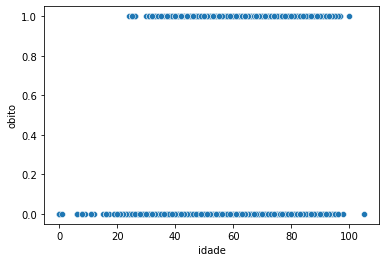

In [327]:
# Importando seaborn e o modelo sns
import seaborn as sns

# Plotando o grafico de dispersão:
sns.scatterplot(x="idade", y="obito", data=dados)

Plotando o mesmo grafico, porem com tonalidade (cor) diferente para o "finalizado":

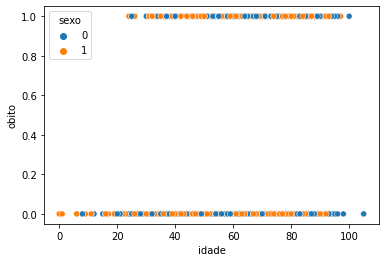

In [328]:
# Plotando o grafico de dispersão com tonalidade diferente:
sns.scatterplot(x="idade", y="obito", hue="sexo", data=dados)

Plotando grafico relativo, em relação a coluna de "diabetes":

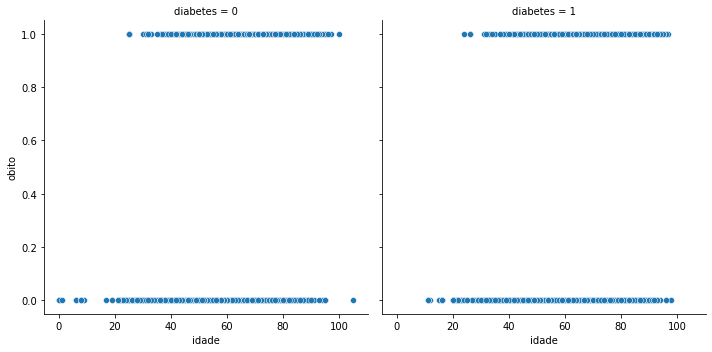

In [329]:
# Plotando o grafico relativo em relação (coluna) do diabetes:
sns.relplot(x="idade", y="obito", col="diabetes", data=dados)

Plotando grafico relativo, em relação a coluna de "finalizados" com diferenciação de cores:

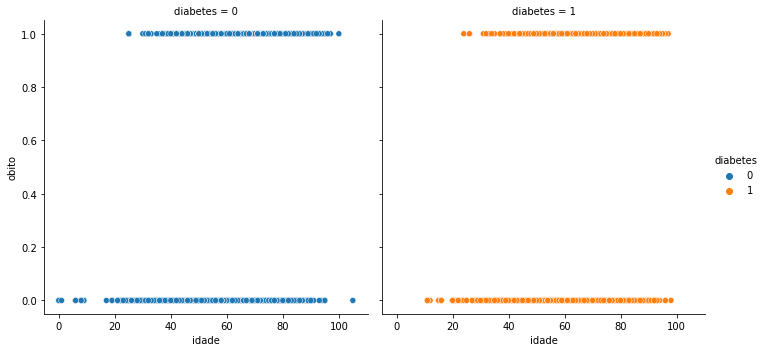

In [330]:
# Plotando o grafico relativo em relação (coluna) do diabetes, diferenciando com cores:
sns.relplot(x="idade", y="obito", hue="diabetes", col="diabetes", data=dados)

Analise grafica scatter dos dados teste_x em relação a teste_Y

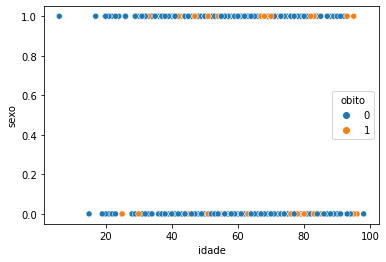

In [331]:
sns.scatterplot(x="idade", y="sexo", hue=teste_y, data=teste_x)

Determinando X e Y min e max para os dados de treino:

In [332]:
x_min = teste_x.sexo.min()
x_max = teste_x.sexo.max()
y_min = teste_x.idade.min()
y_max = teste_x.idade.max()

print (x_min, x_max)
print (y_min, y_max)

0 1
6 98


Visualização da curva de decisão:

In [333]:
# Define a resolução de pixel (pontos a serem analisados entre os min e max):
pixels = 100

# Calcula um range entre os valores xmin e xmax e ymin e ymax para ser analisado:
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/pixels)

# Juntando os pontos X e Y para obter um grid:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[0.000e+00, 6.000e+00],
       [1.000e-02, 6.000e+00],
       [2.000e-02, 6.000e+00],
       ...,
       [9.700e-01, 9.708e+01],
       [9.800e-01, 9.708e+01],
       [9.900e-01, 9.708e+01]])

Refazendo a predição com os pontos:

In [334]:
# Fazendo a predição dos pontos:
Z = modelo.predict(pontos)

# Redimencionar os pontos 100 x 100:
Z = Z.reshape(xx.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"


Plotando a curva de decisão:

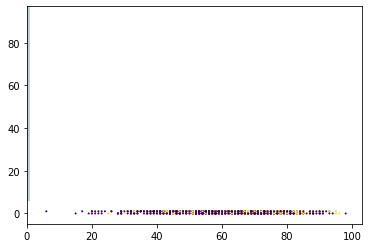

In [335]:
# Importar a biblioteca matplot e modulo plt:
import matplotlib.pyplot as plt

# Plotagem Scatter:
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.idade, teste_x.sexo, c=teste_y, s=1)

# TREINAMENTO / TESTE / ACURACIA - LINEARSVC

Importando as bibliotecas e modulos necessarios:

In [336]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

Treinando, Testando e Acuracia:

In [337]:
# Treinando:
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

# Testando:
previsoes = modelo.predict(teste_x)

# Acurácia:
acuracia = accuracy_score(teste_y, previsoes)*100
print(f"Acuracia: {acuracia:.2f}")

Acuracia: 75.30


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


# TREINAMENTO / TESTE / ACURACIA - DUMMYCLASSIFIER

Importando as bibliotecas e modulos necessarios:

In [338]:
from sklearn.dummy import DummyClassifier

DUMMY STRATIFIED - Treinando, Testando e Acuracia:

In [339]:
# Treinando:
dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)

# Testando:
previsoes2 = dummy_stratified.predict(teste_x)

# Acurácia:
acuracia2 = accuracy_score(teste_y, previsoes2)*100
print(f"Acuracia Dummy Stratified: {acuracia2:.2f}")

Acuracia Dummy Stratified: 75.30


DUMMY MOSTFREQUENT - Treinando, Testando e Acuracia:

In [340]:
# Treinando:
dummy_mostfrequent = DummyClassifier()
dummy_mostfrequent.fit(treino_x, treino_y)

# Testando:
previsoes3 = dummy_mostfrequent.predict(teste_x)

# Acurácia:
acuracia3 = accuracy_score(teste_y, previsoes3)*100
print(f"Acuracia Dummy Mostfrequent: {acuracia3:.2f}")

Acuracia Dummy Mostfrequent: 75.30


#Base de dados 2

Importando as bibliotecas e modulos necessarios:

In [341]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

Recriando as bases de dados - SVC:

In [342]:
SEED = 20
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.30,
                                                                stratify = y)
print (f"Treino: {len(treino_x)} | Teste: {len(teste_x)}")

scaler = StandardScaler()
scaler.fit(raw_treino_x)

treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

Treino: 2361 | Teste: 1012


# TREINAMENTO / TESTE / ACURACIA - SVC

Treinando, Testando e Acurácia com Modelo Sklearn SVC:

In [343]:
# Treinando:
modelo2 = SVC()
modelo2.fit(treino_x, treino_y)

# Testando:
previsoes4 = modelo2.predict(teste_x)

# Acurácia:
acuracia4 = accuracy_score(teste_y, previsoes4)*100
print(f"Acuracia Modelo SVC: {acuracia4:.2f}%")

Acuracia Modelo SVC: 75.20%
